- Bank Marketing - 포르투갈의 은행에서 고객에게 예금 상품을 전화 홍보, 결과를 예측
- 3가지 클러스터링 방식으로 고객들을 클러스터링 하세요
  - (K Means, 병합 군집, DBSCAN)
      1. 문자를 숫자로 원핫 인코딩
      1. 2차원으로 축소 PCA
      1. K-Means(k선택), 병합군집(k선택), DBSCAN(eps거리 조절)
      1. scatter 그래프로 시각화
- 결정트리(교사학습)
    1. 원핫 인코딩
    1. X, Y 분리
    1. 결정 트리 학습
    1. 트리 그래프로 시각화

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('bank.csv', sep=';')
df.shape

(4521, 17)

In [7]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [8]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
(df['y']=='yes').mean()

0.11523999115239991

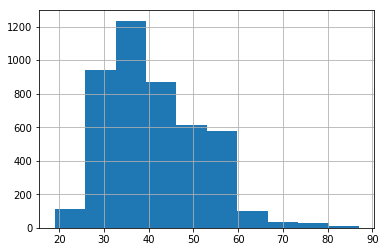

In [13]:
# 데이터분석
df['age'].hist()

In [15]:
df.isna().sum().sum() # 누락 값은 없다

0

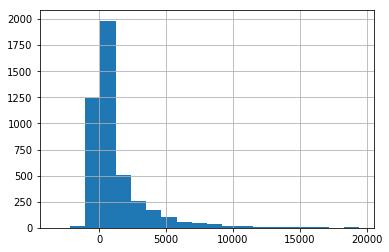

In [23]:
df[df.balance<20000].balance.hist(bins=20)

- 3가지 클러스터링(비교사학습)을 하세요
      1. 문자를 숫자로 원핫 인코딩
      1. 2차원으로 축소 PCA
      1. K-Means(k선택), 병합군집(k선택), DBSCAN(eps거리 조절)
      1. scatter 그래프로 시각화
      
- 결정트리(교사학습)
    1. 원핫 인코딩
    1. X, Y 분리
    1. 결정 트리 학습
    1. 트리 그래프로 시각화

- 고객에게 전화를 걸어 상품을 홍보하라는 임무를 받았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요?
   

In [41]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import mglearn

In [26]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [124]:
df1 = pd.get_dummies(df)
df1.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [125]:
df1.shape

(4521, 53)

In [126]:
pca = PCA(n_components=2).fit(df1)
df1_pca = pca.transform(df1)
df1_pca.shape

(4521, 2)

In [133]:
km = KMeans(n_clusters=3).fit(df1_pca)
group = km.predict(df1_pca)

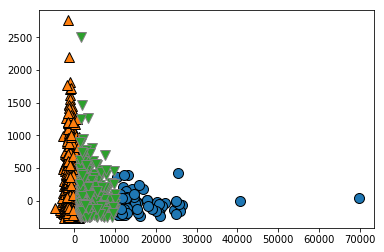

In [134]:
l = mglearn.discrete_scatter(df1_pca[:,0], df1_pca[:,1], group)

In [135]:
model = AgglomerativeClustering(n_clusters=3).fit(df1_pca)  # x를 3개의 그룹으로 모아

In [136]:
p = model.fit_predict(df1_pca) # predict

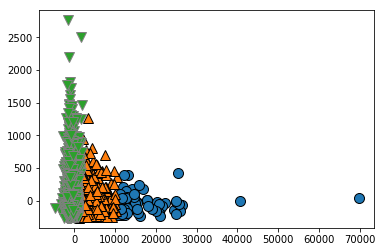

In [137]:
mglearn.discrete_scatter(df1_pca[:,0],df1_pca[:,1],p)

In [51]:
from sklearn.cluster import DBSCAN

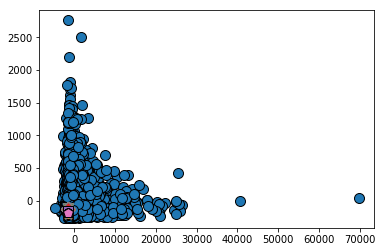

In [56]:
#p = DBSCAN(eps=2.0, min_samples=10).fit_predict(df1_pca)  # k 개를 정해주지 않습니다.
p = DBSCAN(eps=2.0).fit_predict(df1_pca)  # k 개를 정해주지 않습니다.
l = mglearn.discrete_scatter(df1_pca[:,0],df1_pca[:,1],p)

## ==============================================

## ==============================================

- 결정트리(교사학습)
    1. 원핫 인코딩
    1. X, Y 분리
    1. 결정 트리 학습
    1. 트리 그래프로 시각화
    
- 고객에게 전화를 걸어 상품을 홍보하라는 임무를 받았습니다. 가능하면 상품에 가입해줄만한 사람에게 연락을 하고 싶습니다. 상품에 가입해줄 착한 고객을 어떻게 찾으면 좋을까요?

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv('bank.csv', sep=';')
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [141]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df_hot = pd.get_dummies(df)
x = df_hot.iloc[:, :-2]
y = df_hot.iloc[:, -2]
x.shape, y.shape

((4521, 51), (4521,))

In [153]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: y_no, dtype: uint8

In [143]:
tree = DecisionTreeClassifier().fit(x,y)
importance = pd.DataFrame(tree.feature_importances_, x.columns)

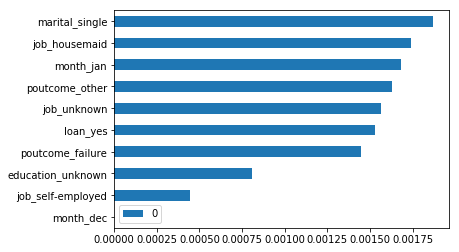

In [144]:
p = importance.sort_values(by=0).head(10).plot.barh()

In [145]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
x_pca = PCA(n_components=2).fit_transform(x)
p = AgglomerativeClustering(n_clusters=2).fit_predict(x_pca)

In [146]:
import mglearn

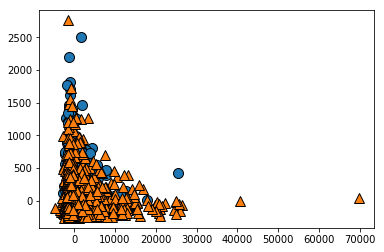

In [147]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], y) # 실제로 상품 가입해준 사람

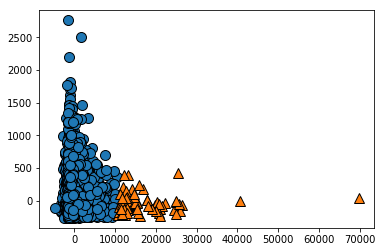

In [148]:
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], p) # 클러스터링 해본 결과

In [154]:
from sklearn.cluster import DBSCAN

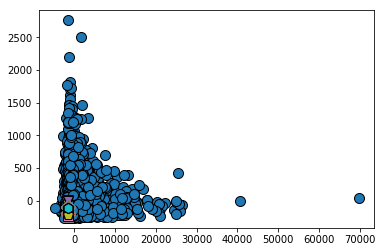

In [155]:
#p = DBSCAN(eps=2.0, min_samples=10).fit_predict(df1_pca)  # k 개를 정해주지 않습니다.
p = DBSCAN(eps=2.0).fit_predict(x_pca)  # k 개를 정해주지 않습니다.
l = mglearn.discrete_scatter(x_pca[:,0],x_pca[:,1],p)

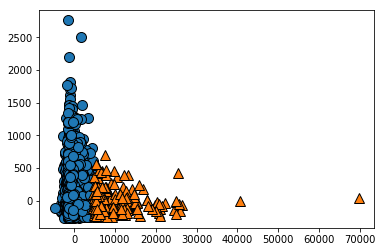

In [156]:
km = KMeans(n_clusters=2).fit(x_pca)
group = km.predict(x_pca)
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group)

In [157]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(x,y)

In [159]:
model.score(x, y)

0.9126299491262995

In [160]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"]+= os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

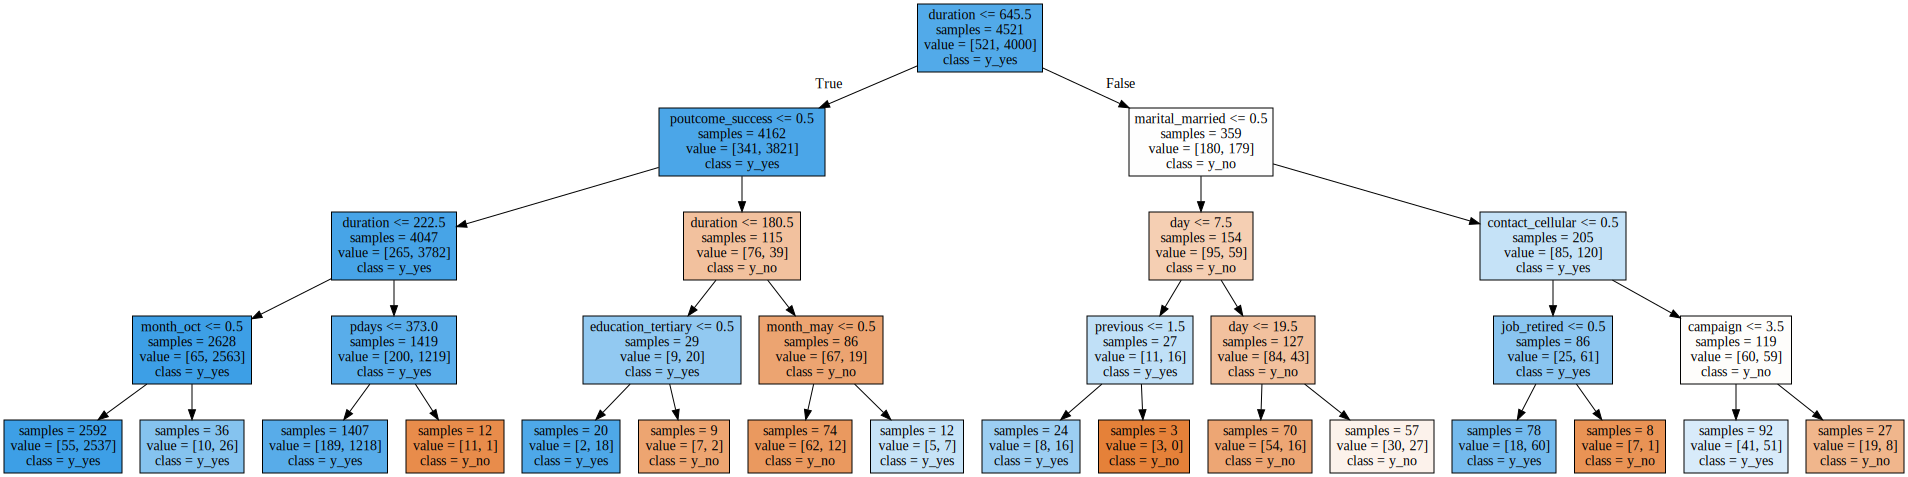

None

In [161]:
export_graphviz(model, out_file='bank.dot', class_names=['y_no','y_yes'],
               feature_names=x.columns, impurity=False, filled=True)
with open('bank.dot') as f:
    dot_graph = f.read()
display(display(graphviz.Source(dot_graph)))